In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport

from mastercard import dist_visualisation, dist_categorical_visualisation


2025-06-08 09:04:01.064 | INFO     | mastercard.config:<module>:11 - PROJ_ROOT path is: /home/marcin/workspace/data_sience/mastercard


In [42]:
PROCESSED_DATA = Path("../data/processed/")

In [43]:
df = pd.read_parquet(PROCESSED_DATA / "transactions.parquet")

In [44]:
df.shape


(500000, 14)

In [45]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object

In [46]:
df.sample(10)


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
22482,TX022482,2022-05-07 07:09:00,U02623,M0251,24.17,online,EUR,iOS,"{'lat': 66.781819, 'long': 25.994521}",credit_card,0,78,1,0
265146,TX265146,2022-03-25 21:51:00,U04708,M0034,6.14,in-store,EUR,iOS,"{'lat': 47.713408, 'long': 23.30274}",mobile_payment,1,611,1,0
421197,TX421197,2022-07-23 06:45:00,U06438,M0091,214.61,in-store,EUR,Android,"{'lat': 42.214884, 'long': 19.395576}",debit_card,1,299,0,0
10,TX000010,2023-01-14 23:57:00,U07741,M0617,3.71,in-store,EUR,Web,"{'lat': 40.793486, 'long': 13.536627}",debit_card,1,633,0,0
300221,TX300221,2022-12-08 03:25:00,U04243,M0371,239.21,mobile,EUR,Web,"{'lat': 67.954391, 'long': 17.535844}",credit_card,1,497,1,0
334624,TX334624,2022-10-01 23:53:00,U02010,M0843,16.71,in-store,EUR,Web,"{'lat': 54.296965, 'long': 29.039324}",bank_transfer,1,399,0,1
287801,TX287801,2022-02-27 05:12:00,U03011,M0572,23.20,mobile,EUR,Android,"{'lat': 63.262902, 'long': 34.463014}",bank_transfer,1,817,0,0
394878,TX394878,2023-08-05 00:09:00,U13602,M0926,63.19,online,EUR,Web,"{'lat': 61.050416, 'long': 25.392724}",credit_card,1,994,1,0
263181,TX263181,2022-04-17 17:56:00,U03405,M0996,15.40,online,EUR,Web,"{'lat': 46.609363, 'long': 5.661601}",bank_transfer,1,366,1,0
10777,TX010777,2022-12-20 16:12:00,U09722,M0394,43.35,online,EUR,iOS,"{'lat': 55.853546, 'long': 32.82134}",mobile_payment,1,1131,0,0


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          500000 non-null  object        
 1   timestamp               500000 non-null  datetime64[ns]
 2   user_id                 500000 non-null  object        
 3   merchant_id             500000 non-null  object        
 4   amount                  500000 non-null  float64       
 5   channel                 500000 non-null  object        
 6   currency                500000 non-null  object        
 7   device                  500000 non-null  object        
 8   location                500000 non-null  object        
 9   payment_method          500000 non-null  object        
 10  is_international        500000 non-null  int64         
 11  session_length_seconds  500000 non-null  int64         
 12  is_first_time_merchant  500000

## Descriptive statistics
- univariate analysis
- bivariate analysis
- multivariate analysis

In [48]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,500000,2022-12-31 16:45:04.497720576,2022-01-01 00:06:00,2022-07-01 11:03:45,2022-12-31 20:08:30,2023-07-02 08:45:15,2023-12-31 23:57:00,NaN
amount,500000.0,49.915662,0.0,14.37,34.56,69.1725,714.86,49.990657
is_international,500000.0,0.928662,0.0,1.0,1.0,1.0,1.0,0.257389
session_length_seconds,500000.0,614.987182,30.0,323.0,614.0,907.0,1200.0,338.091496
is_first_time_merchant,500000.0,0.501248,0.0,0.0,1.0,1.0,1.0,0.499999
is_fraud,500000.0,0.084822,0.0,0.0,0.0,0.0,1.0,0.278617


### Target variable

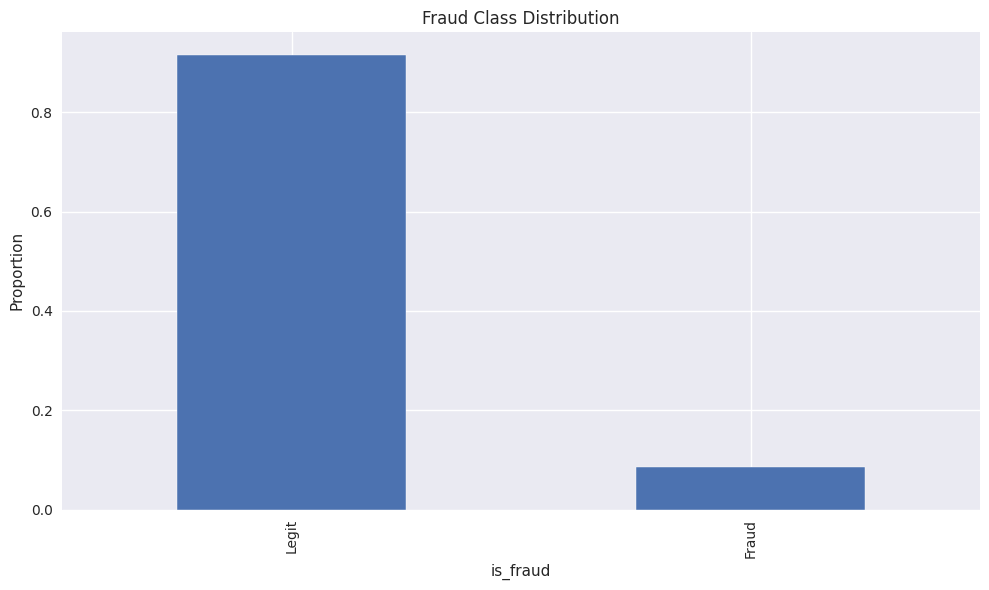

In [49]:
fraud_counts = df["is_fraud"].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(10, 6))
fraud_counts.plot(kind="bar", ax=ax)
ax.set_title("Fraud Class Distribution")
ax.set_xticks([0,1])
ax.set_xticklabels(["Legit", "Fraud"])
ax.set_ylabel("Proportion")
plt.tight_layout()
plt.show()

##### Summary: Class distribution is highly inbalanced

- accuracy—will be misleading
- use metrics like F1-score, Recall, ROC-AUC
- consider resampling (undersample, oversampling)
- use algorithms with built-in support for imbalanced data(e.g. XGBoost)

## Numerical features

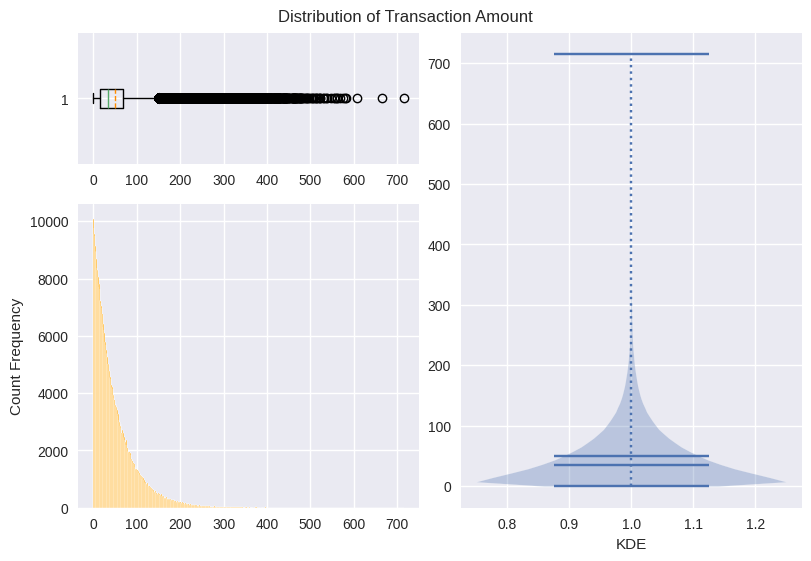

In [50]:
dist_visualisation(df["amount"], title="Distribution of Transaction Amount")

In [51]:
df.loc[df["amount"] < 1, "amount"].count() # duzo transacji poniżej dolara


np.int64(9986)

In [52]:
df["amount"].describe()


count    500000.000000
mean         49.915662
std          49.990657
min           0.000000
25%          14.370000
50%          34.560000
75%          69.172500
max         714.860000
Name: amount, dtype: float64

#### Summary: amount is strongly right-skewed with a long tail, this suggests the presence of outliers'
- recomendation: apply log transformation (eg. log1p) for algorithms sensitivev to distribution shape

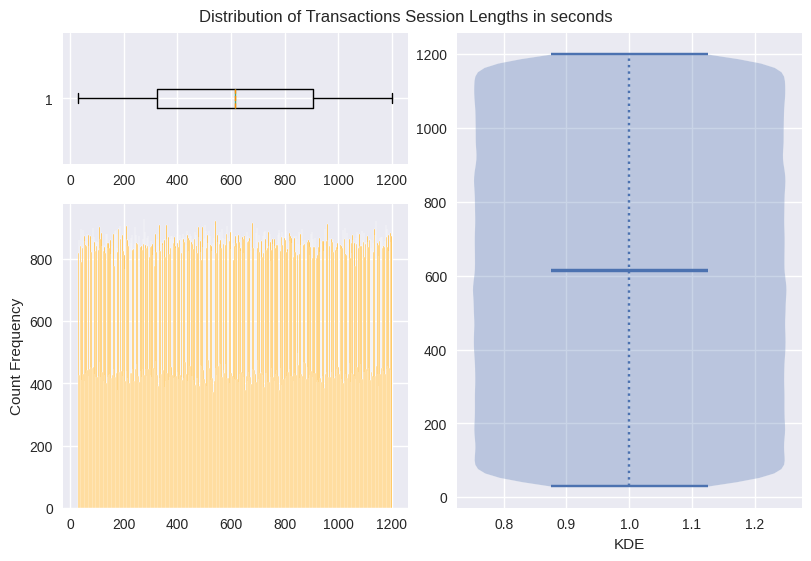

In [53]:
dist_visualisation(df["session_length_seconds"], title="Distribution of Transactions Session Lengths in seconds")

#### Summary: session_length_seconds is uniform distributed, wich is unusual in real behavioral data
- indicates synthetic generation or flattening
- low predictive power unless frauds are concentrated in specific ranges(to be checked later)


## Categorical Features

In [54]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object

In [55]:
categorical_cols = ["channel", "currency", "device", "payment_method", "is_international", "is_first_time_merchant"]

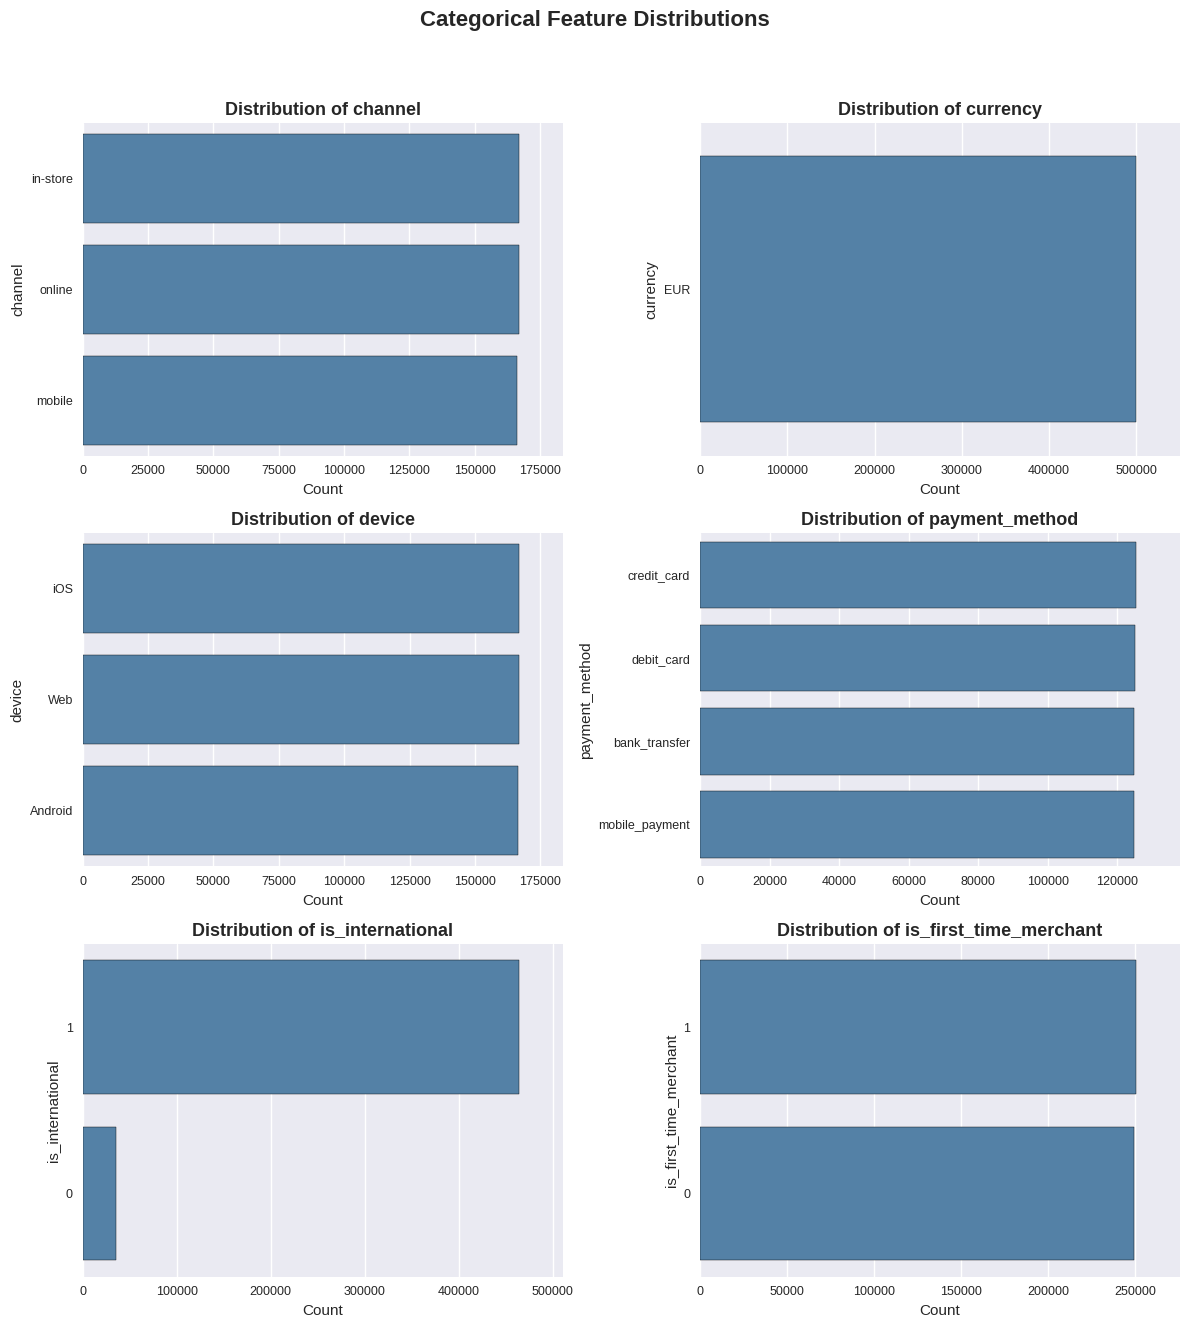

In [56]:
fig, ax = dist_categorical_visualisation(df, categorical_cols)

In [57]:
df["channel"].value_counts()

channel
in-store    167027
online      166847
mobile      166126
Name: count, dtype: int64

#### Summary:
- channel, device, payment_method , show almost perfectly balanced category distribution
    - unusual in real-world data and indicates synthetic balancing on control generation
- currency has only one value, making it non informative
    - recomendation: drop this feature

## Multivarient analysis



### Amount vs is_fraud

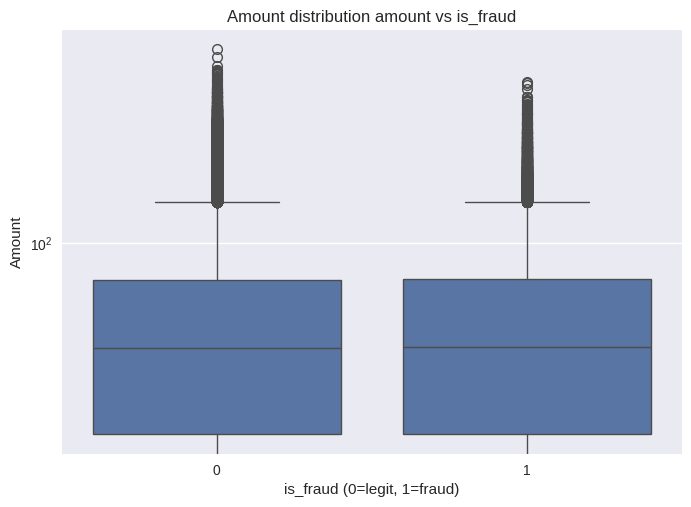

In [58]:
fig, ax = plt.subplots()
sns.boxplot(x="is_fraud", y="amount", data=df, ax=ax)
ax.set_title("Amount distribution amount vs is_fraud")
ax.set_xlabel("is_fraud (0=legit, 1=fraud)")
ax.set_ylabel("Amount")
ax.set_yscale("log") # stosować gdy jest dużo outlierów

plt.show()

#### Summary:
- amount is not discriminating feature by itself for fraud detection
- distribution are very similar
- my still be usefull when combinate with other features

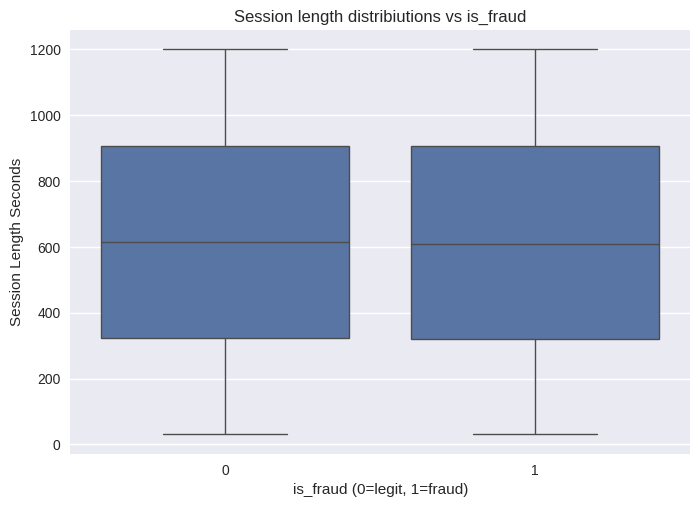

In [59]:
fig, ax = plt.subplots()
sns.boxplot(x="is_fraud", y="session_length_seconds", data=df, ax=ax)
ax.set_title("Session length distribiutions vs is_fraud")
ax.set_xlabel("is_fraud (0=legit, 1=fraud)")
ax.set_ylabel("Session Length Seconds")
plt.show()

In [60]:
# profile = ProfileReport(df, title="Profiling Report")

In [61]:
# profile.to_file("raport.html")


## Time-based analysis


In [62]:
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud,hour,dayofweek
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0,23,4
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0,15,1
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0,21,4
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0,6,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0,8,3


In [63]:
df_ts = df.set_index("timestamp").sort_index()
fraud_counts = df_ts.resample("W")["is_fraud"].sum()
total_counts = df_ts.resample("W")["is_fraud"].count()
fraud_rate = (fraud_counts / total_counts).fillna(0)

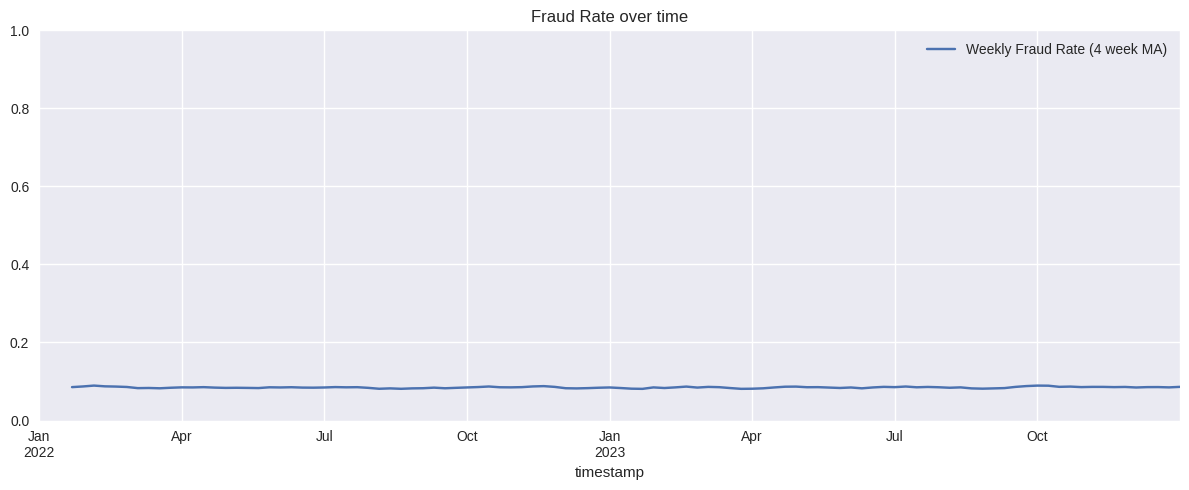

In [64]:
fig, ax = plt.subplots(figsize=(12, 5))

fraud_rate.rolling(4).mean().plot(ax=ax, label="Weekly Fraud Rate (4 week MA)")
ax.set_label("Fraud Rate")
ax.set_title("Fraud Rate over time")
ax.set_ylim(0, 1)
ax.legend()

fig.tight_layout()
plt.show()


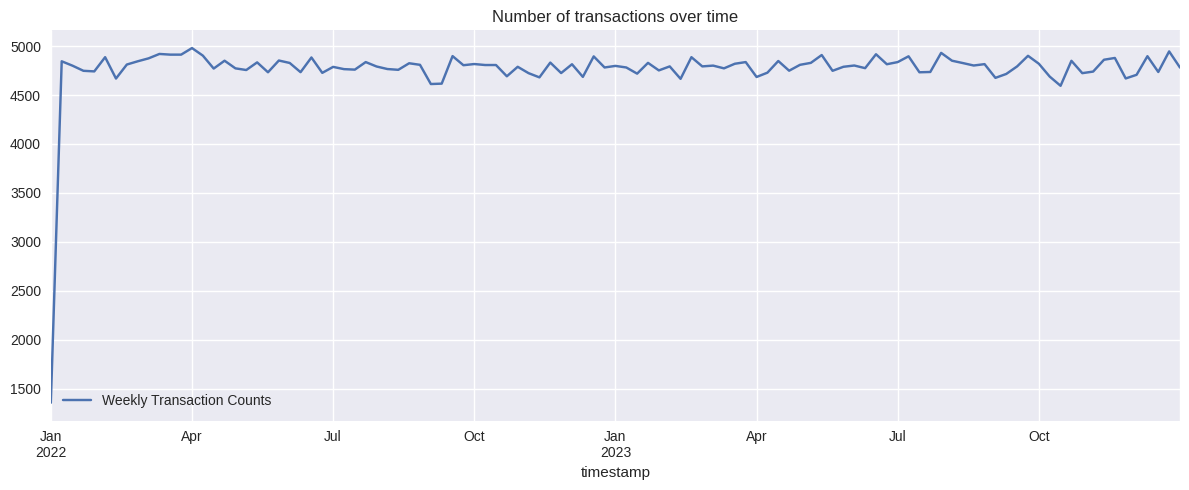

In [65]:
fig, ax = plt.subplots(figsize=(12, 5))

total_counts.plot(ax=ax, label="Weekly Transaction Counts")

ax.set_label("Transaction Counts")
ax.set_title("Number of transactions over time")

ax.legend()


fig.tight_layout()
plt.show()

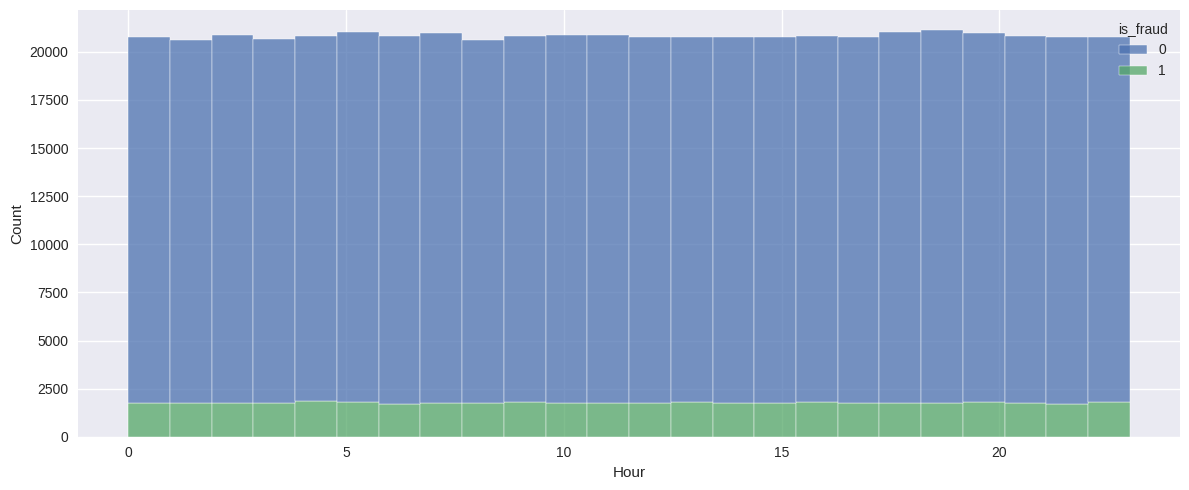

In [66]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_ts, x="hour", hue="is_fraud", bins=24, ax=ax, multiple="stack")

ax.set_xlabel("Hour")
ax.set_ylabel("Count")
ax.set_title("Fraud Frequency by Hour of Day")
ax.set_title("")


fig.tight_layout()
plt.show()

#### 1. Fraud Rate Over Time (weekly trend)
- The fraud rate fluctuates mildly between ~8.1% and 8.9% over the two-year span.
- No clear upward or downward trend, but some short-term volatility is present.
- Suggests that fraud behavior is stationary over time (non-seasonal).

#### 2. Fraud Frequency by Hour of Day
- Fraud and legit transactions are evenly distributed across all hours.
- No visible peak during night or business hours.
- Indicates time of day likely has no predictive signal.

#### 3. Average Fraud Rate by Day of Week
- All days show nearly equal fraud rates (~8.5%).
- No significant weekday vs. weekend pattern.

### Summary
- Time-based features appear non-informative in isolation.
- Their value may emerge only through interactions or in tree-based models.
- Results align with the synthetic structure of the dataset.

In [69]:
features = ["amount", "session_length_seconds", "is_fraud"]
corr = df_ts[features].corr()

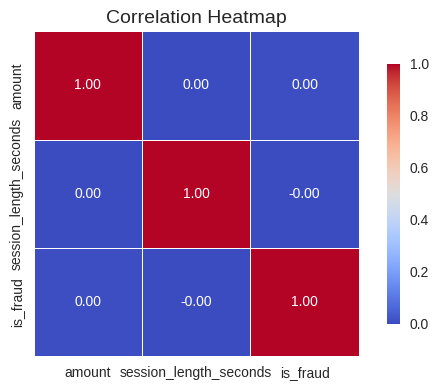

In [71]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    corr,
    ax=ax,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.8},
    cmap="coolwarm",
)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

## Implication
- simple linear models (like Logistic Regression) on raw feature will perform poorly.
- more advanced models will be required. (e.g. decision trees, boosting, neural nets)